In [1]:
import torch
import torch.nn as nn # for creating neural network layers
import torch.nn.functional as F # for activation functions and other functional operations
from torch.optim import SGD # for stochastic gradient descent optimization


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
class BasicNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(0.0), requires_grad=True)

    def forward(self, input):
        input_relu1 = input * self.w00 + self.b00
        output_relu1 = F.relu(input_relu1)
        scaled_output_relu1 = output_relu1 * self.w01

        input_relu2 = input * self.w10 + self.b10
        output_relu2 = F.relu(input_relu2)
        scaled_output_relu2 = output_relu2 * self.w11

        input_final_relu = scaled_output_relu1 + scaled_output_relu2 + self.final_bias

        output = F.relu(input_final_relu)

        return output



In [16]:
input_doses = torch.linspace(start=0, end=1, steps=11)
input_doses

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

In [17]:
model = BasicNN()

In [18]:
output_values = model(input_doses)

In [19]:
output_values

tensor([ 0.0000,  3.4020,  6.8040, 10.2060, 13.6080, 17.0100, 13.4760,  9.9420,
         6.4080,  2.8740,  0.0000], grad_fn=<ReluBackward0>)

In [20]:
output_values.detach()

tensor([ 0.0000,  3.4020,  6.8040, 10.2060, 13.6080, 17.0100, 13.4760,  9.9420,
         6.4080,  2.8740,  0.0000])

Text(0.5, 1.0, 'Dose vs Effectiveness')

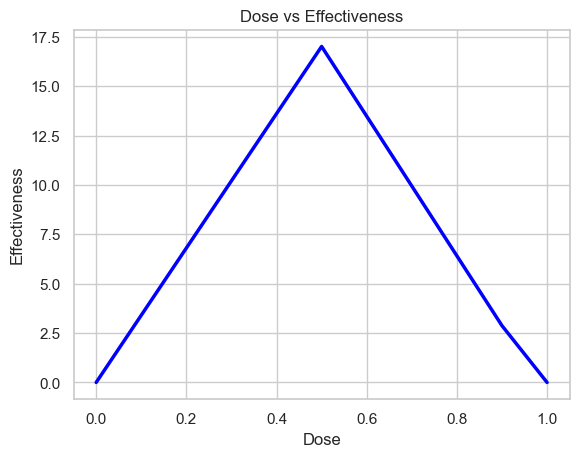

In [21]:
sns.set_theme(style="whitegrid")
sns.lineplot(
    x = input_doses,
    y = output_values.detach(),
    color = 'blue',
    linewidth = 2.5
)

plt.ylabel('Effectiveness')
plt.xlabel('Dose')
plt.title('Dose vs Effectiveness')

In [22]:
inputs = torch.tensor([0., 0.5, 1.])
labels = torch.tensor([0., 1., 0.])

In [29]:
model._parameters

{'w00': Parameter containing:
 tensor(1.7000),
 'b00': Parameter containing:
 tensor(-0.8500),
 'w01': Parameter containing:
 tensor(-40.8000),
 'w10': Parameter containing:
 tensor(12.6000),
 'b10': Parameter containing:
 tensor(0.),
 'w11': Parameter containing:
 tensor(2.7000),
 'final_bias': Parameter containing:
 tensor(0., requires_grad=True)}

In [23]:
optimizer = SGD(model.parameters(), lr=0.1)

In [38]:
print("Final bias, before optimization:", str(model.final_bias.data.item()))

Final bias, before optimization: 0.0


In [40]:
for epoch in range(100):
    total_loss = 0.0

    for iteration in range(len(inputs)):
        input_i = inputs[iteration]
        label_i = labels[iteration]

        output_i = model(input_i)

        loss = (output_i - label_i) ** 2

        loss.backward()

        total_loss += loss
    
    if(total_loss < 0.0001):
        print("Num steps:", str(epoch))
        break

    optimizer.step()
    optimizer.zero_grad()

    print("Step: "+str(epoch)+" Final Bias: "+str(model.final_bias.data.item()))

Step: 0 Final Bias: -3.202000141143799
Step: 1 Final Bias: -5.7636003494262695
Step: 2 Final Bias: -7.812880516052246
Step: 3 Final Bias: -9.45230484008789
Step: 4 Final Bias: -10.763843536376953
Step: 5 Final Bias: -11.813075065612793
Step: 6 Final Bias: -12.652460098266602
Step: 7 Final Bias: -13.323967933654785
Step: 8 Final Bias: -13.861174583435059
Step: 9 Final Bias: -14.290939331054688
Step: 10 Final Bias: -14.634751319885254
Step: 11 Final Bias: -14.909801483154297
Step: 12 Final Bias: -15.129840850830078
Step: 13 Final Bias: -15.305872917175293
Step: 14 Final Bias: -15.446698188781738
Step: 15 Final Bias: -15.559358596801758
Step: 16 Final Bias: -15.649486541748047
Step: 17 Final Bias: -15.721589088439941
Step: 18 Final Bias: -15.779271125793457
Step: 19 Final Bias: -15.825416564941406
Step: 20 Final Bias: -15.862333297729492
Step: 21 Final Bias: -15.891866683959961
Step: 22 Final Bias: -15.91549301147461
Step: 23 Final Bias: -15.934394836425781
Step: 24 Final Bias: -15.949516

In [41]:
print("Final bias, after optimization:", str(model.final_bias.data.item()))

Final bias, after optimization: -16.001882553100586


Text(0.5, 0, 'Dose')

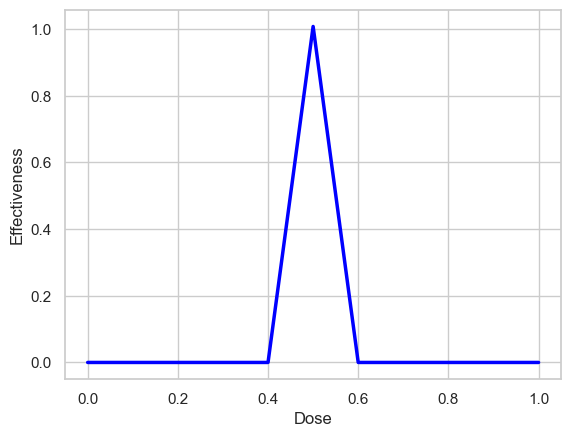

In [42]:
output_values = model(input_doses)
sns.set_theme(style="whitegrid")
sns.lineplot(
    x = input_doses,
    y = output_values.detach(),
    color = 'blue',
    linewidth = 2.5
)
plt.ylabel('Effectiveness')
plt.xlabel('Dose')